In [482]:
print("This is a project to find age and gender")

This is a project to find age and gender


In [483]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [484]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import dlib
import numpy as np

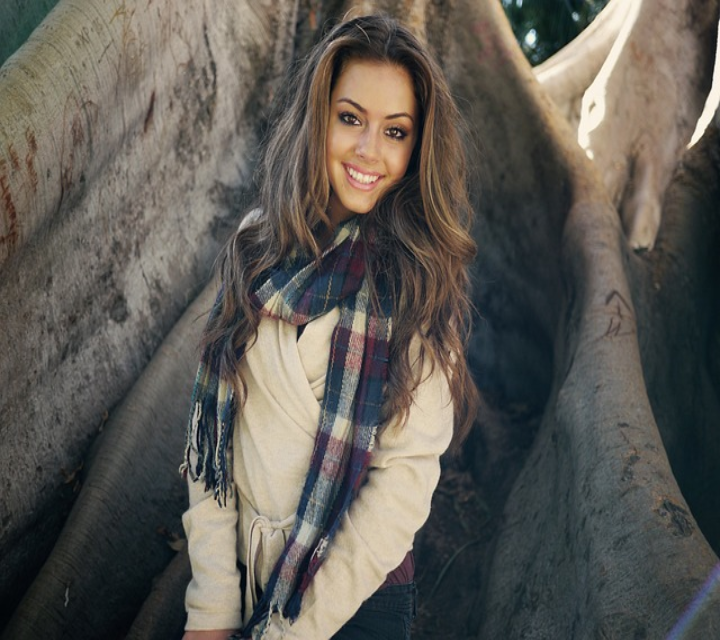

In [485]:
img=cv.imread('/content/drive/MyDrive/Colab Notebooks/gad/woman4.jpg')
img=cv.resize(img,(720,640))
cv2_imshow(img)

In [486]:
Dup=img.copy()

In [487]:
face1 = "/content/drive/MyDrive/Colab Notebooks/gad/opencv_face_detector.pbtxt"
face2 = "/content/drive/MyDrive/Colab Notebooks/gad/opencv_face_detector_uint8.pb"
net_face = cv.dnn.readNet(face2, face1)

In [488]:
weights_age="/content/drive/MyDrive/Colab Notebooks/gad/age_deploy.prototxt"
config_age="/content/drive/MyDrive/Colab Notebooks/gad/age_net.caffemodel"
net_age= cv.dnn.readNet(config_age,weights_age)

In [489]:
weights_gender="/content/drive/MyDrive/Colab Notebooks/gad/gender_deploy.prototxt"
config_gender="/content/drive/MyDrive/Colab Notebooks/gad/gender_net.caffemodel"
net_gender=cv.dnn.readNet(config_gender,weights_gender)

In [490]:
age_range=['(0-2)', '(4-6)', '(8-12)', '(15-20)',
           '(25-32)', '(38-43)', '(48-53)', '(60-100)']
model_mean=(78.4263377603, 87.7689143744, 114.895847746)

In [491]:
gender=['Male','Female']

In [492]:
Dup_height=img.shape[0]
Dup_width=img.shape[1]
prepro=cv.dnn.blobFromImage(Dup,1.0,(227,227),model_mean,swapRB=False)
net_face.setInput(prepro)
detections = net_face.forward()

In [493]:
boxes=[]
ans='Face Detected'

In [494]:

faceboxes = []
for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.7:

        x1 = int(detections[0, 0, i, 3]*Dup_width)
        y1 = int(detections[0, 0, i, 4]*Dup_height)
        x2 = int(detections[0, 0, i, 5]*Dup_width)
        y2 = int(detections[0, 0, i, 6]*Dup_height)

        faceboxes.append([x1, y1, x2, y2])

        cv.rectangle(Dup, (x1, y1), (x2, y2),
                      (0, 255, 0), int(round(Dup_height/150)), 8)


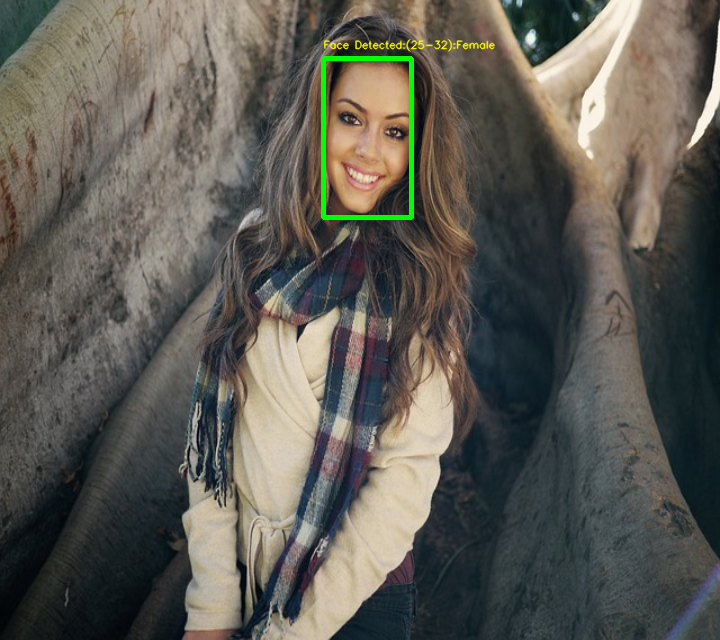

In [495]:
if not faceboxes:
  print("No faces detected !!!")
else:
    for box in faceboxes:
      face = Dup[max(0, box[1]-15):
                 min(box[3]+15, Dup.shape[0]-1),
                 max(0, box[0]-15):min(box[2]+15,
                               Dup.shape[1]-1)]

      prepro=cv.dnn.blobFromImage(face,1.0,(227,227),model_mean,swapRB=False)

      net_age.setInput(prepro)
      Predicted_age=net_age.forward()
      age=age_range[Predicted_age[0].argmax()]

      net_gender.setInput(prepro)
      Predicted_gender=net_gender.forward()
      gen=gender[Predicted_gender[0].argmax()]
      cv.putText(Dup,f'{ans}:{age}:{gen}',(box[0],box[1]-10),cv.FONT_ITALIC,0.35,(0,255,255),1,cv.LINE_AA)

      cv2_imshow(Dup)
      cv.waitKey(0)


